# Overview of Tidyverse

Tidyverse is a collection of R packages for data science
- It was introduced by Hadley Wickham (https://en.wikipedia.org/wiki/Hadley_Wickham)
- The packages provide a consistent grammar for data science
- It encompasses the entire workflow from data import to communicating the results of the analysis

![tidy_workflow.png](images/tidy_workflow.png)

You can learn more about tidyverse using this free e-textbook by Hadley Wickham: https://r4ds.had.co.nz

![book.png](images/book_tidy.png)
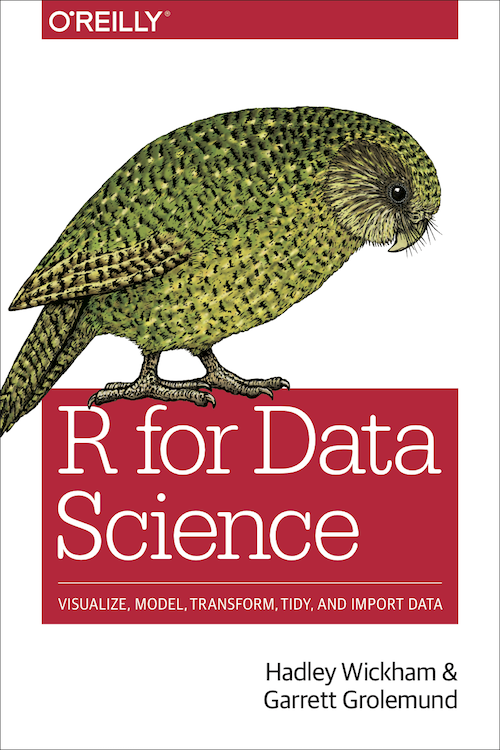
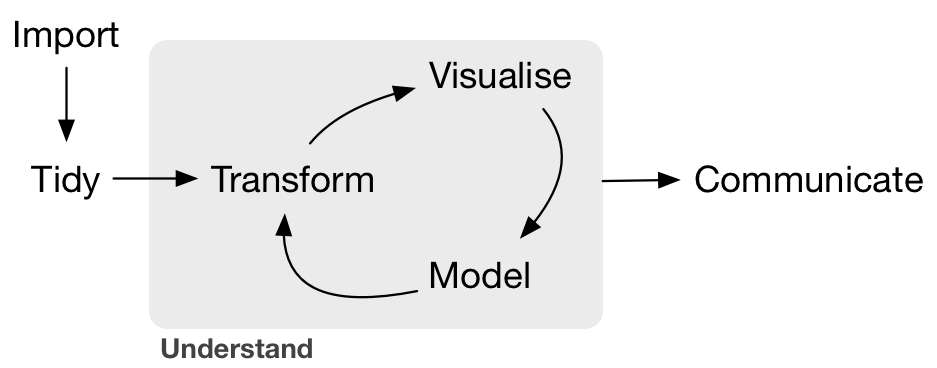

---
## A brief tour of the tidyverse package

The tidyverse core package imports several R packages for data import, transformation, and visualization

![tidy_core.png](images/tidy_core.png)

It provides a consistent grammar that allows functions to be combined in the analysis of data
- noun: container for the data (tibble)
- verbs: functions to manipulate data

We will load the library and use a dataset to illustrate its use in data exploration
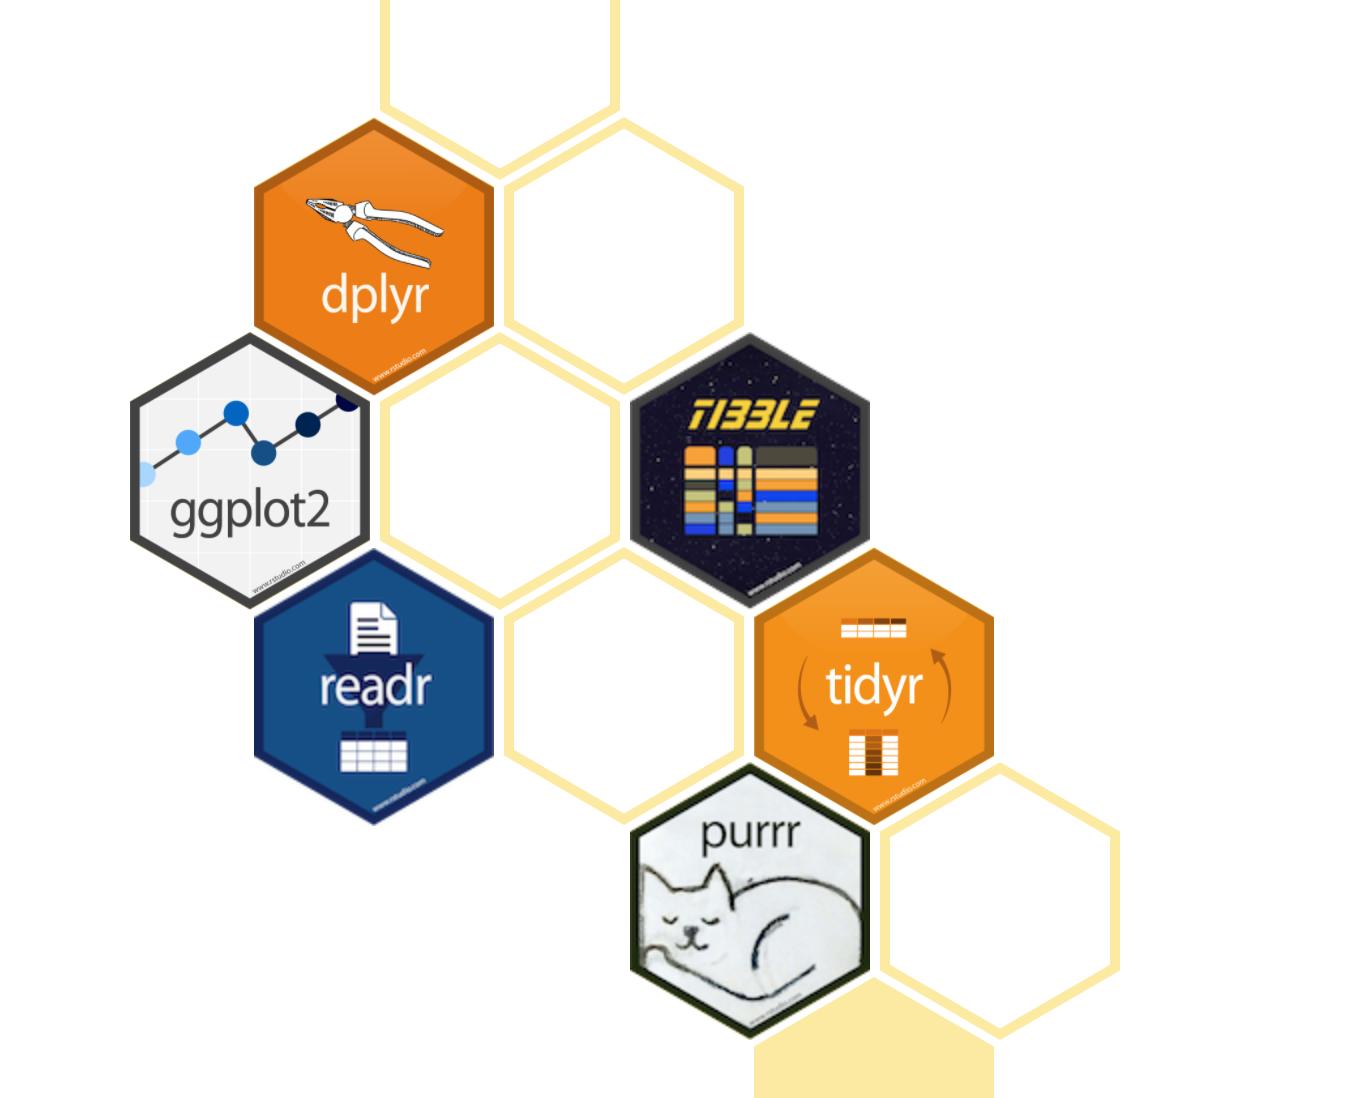

We will import a dataset from the Framingham study, which was a long term study of cardiovascular disease about subjects in Framingham, USA. In this dataset
- ~4000 subjects followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

The variables include

- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)

In [ ]:
library(tidyverse)

# reading in data
data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

class(data)

In [ ]:
# see first few rows

head(data)

## Examples of tidyverse functions (verbs)

In [ ]:
# selecting only certain columns

select(data, male, diabetes)

In [ ]:
# filtering by criteria

filter(data, age > 65)

In [ ]:
# arranging or sorting

arrange(data, age)

---
## Combining several functions

What if we want to combine several functions?
- ```select``` male, age and totChol columns
- ```filter``` age > 65
- ```arrange``` by age

We can do this by nesting the functions

![function_nesting.png](images/function_nesting.png)

In [ ]:
arrange(filter(select(data, male, age, totChol), age > 65),age)

As you can see, nesting functions can be unwieldy and hard to read or write

---
## Using the pipe %>% operator

In tidyverse, we can use the pipe ```%>%``` operator for functions that accept input data as the **first** argument

- the ```%>%``` operator places the input data as the **first** argument, so you omit it when you specify arguments in the function

![tidy_pipe.png](images/tidy_pipe.png)
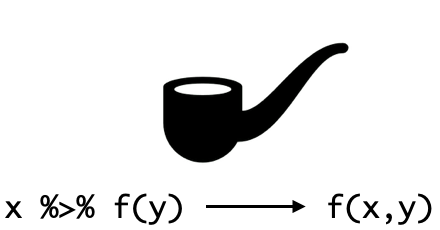

In [ ]:
# using the pipe syntax

data %>% select(male, age, totChol)

Why use this pipe syntax?
- It makes it easier to _chain_ several functions together
- It is easier to _understand_ the order of actions being performed on the data

In [ ]:
data %>% 
select(male, age, totChol) %>%
filter(age > 65) %>%
arrange(age)

## Using pipe with other functions


What functions can I use?
- Besides tidyverse functions, we can use any function that accepts a _compatible_ input from the output of a tidyverse function

In [ ]:
data %>% 
select(age) %>% 
mean()

So what's going on? 
- The ```mean``` function accepts a ```vector``` of numbers
- Let's take a look at the output when we select the ```age``` column from data

In [ ]:
data %>% select(age)

The output is _not_ a ```vector```, but it returns a ```1-column tibble```
- This is accepted by `tidyverse` functions but not by others (e.g. base functions)
- So, we need to extract the ```age``` column so it will be returned as a ```vector```
- We can use the verb `pull` to extract the column as a `vector` that can be used by functions that accept it

In [ ]:
data %>% pull(age)

We can now pass the `vector` from the `age` column to the function `mean`

In [ ]:
data %>% 
pull(age) %>% 
mean()

---
## Exercise - Pipes

In [ ]:
library(tidyverse)

screen <- data.frame(id=c(20201,20205,20212,20213,20216), 
                     age=c(19,45, 23, 55, 65),
                     sysBP=c(120,150,130,65,155),
                     contact=c(T,F,T,F,F),
                     cluster=c(T,T,F,T,F))
    
screen

### Part 1
Select the ```age``` and ```sysBP``` columns and arrange the table by the ```sysBP``` using the ```%>%``` pipe operator

In [ ]:
# start here

In [ ]:
# solution

screen %>% 
select(age, sysBP) %>%
arrange(sysBP)

### Part 2

Find the ```mean``` of the ```sysBP``` of patients who are older than 40 years of ```age``` using the ```%>%``` pipe operator

In [ ]:
# start here

In [ ]:
# solution

screen %>% 
filter(age > 40) %>%
pull(sysBP) %>%
mean()